# Fun with continued fractions and Taylor approximations

A Taylor series of a function is kind of like a decimal representation of a real number, where instead of base 10 we use "base x" to represent functions of x.

What happens if we replace "decimal representation" with "[continued fraction](https://en.wikipedia.org/wiki/Continued_fraction) representation"?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Say we want to approximate y = log(1 + x) near x = 0. Here's a graph of this function:

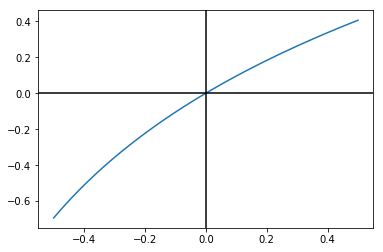

In [2]:
x = np.linspace(-0.5, 0.5)
y = np.log1p(x)

plt.plot(x, y)
plt.axhline(0, color='black')
plt.axvline(0, color='black')

Our first order approximation is y = x. This matches the slope and intercept at x = 0:

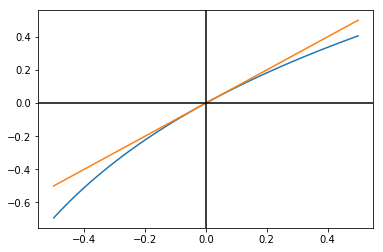

In [3]:
plt.plot(x, y)
plt.plot(x, x)
plt.axhline(0, color='black')
plt.axvline(0, color='black')

Suppose now we want more terms in the Taylor approximation. We could take derivatives and plug it into the general formula but here's a more heuristic approach (which we will modify later).

Reason if $ y \approx x $, then $ y/x \approx 1 $. Define $z_1 = y/x$ and plot it as a function of x. We find that we can get a better approximation for $z_1$ by matching *its* slope at x = 0:

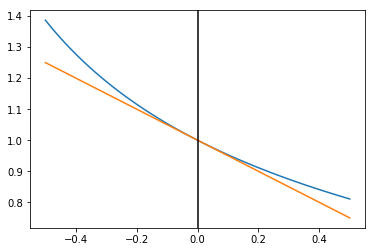

In [4]:
plt.plot(x, y/x)
plt.plot(x, 1 - x/2)
plt.axvline(0, color='black')

Working backward this gives us a second order Taylor approximation.

$$ \begin{align}
y/x &= z_1 \approx 1 - x/2 \\
y &= xz_1 \\
y &\approx x(1 - x/2) \\
&\approx x - x^2/2
\end{align} $$

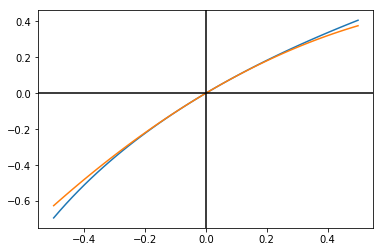

In [5]:
plt.plot(x, y)
plt.plot(x, x - x*x/2)
plt.axhline(0, color='black')
plt.axvline(0, color='black')

We can keep going to get the third term

$$ \begin{align}
y &\approx x + x^2(-1/2) \\
y &= x + x^2 z_2 \\
y/x &= 1 + xz_2 \\
y/x - 1 &= xz_2 \\
(y/x - 1)/x &= z_2
\end{align} $$

so we plot (y/x - 1)/x and once again match its slope

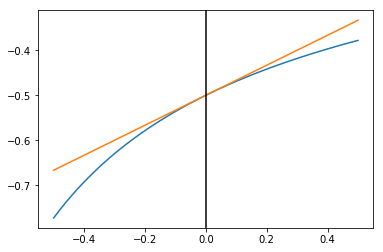

In [6]:
plt.plot(x, (y/x-1)/x)
plt.plot(x, -1/2 + x/3)
plt.axvline(0, color='black')

and plug it back in to get the third order Taylor expansion

$$ \begin{align}
y &= x + x^2 z_2 \\
y &\approx x + x^2 (-1/2 + x/3) \\
&= x - x^2/2 + x^3/3
\end{align} $$

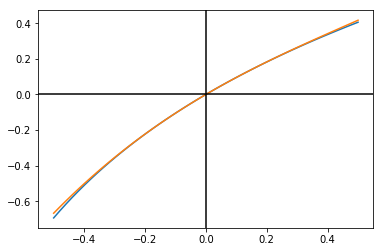

In [7]:
plt.plot(x, y)
plt.plot(x, x - x*x/2 + x*x*x/3)
plt.axhline(0, color='black')
plt.axvline(0, color='black')

And we can keep going like this to get more and more terms in the Taylor series.

To summarize what we've been doing so far:

* Approximate a function as constant + linear in x
* Subtract out the constant and divide what's left by x, to get something approximately constant
* Replace "constant" with "constant + linear" and repeat

## Enter continued fractions

Now to this basic procedure we're going to make one change:

* Approximate a function as constant + linear in x
* Subtract out the constant and **divide x by what's left**, to get something approximately constant
* Replace "constant" with "constant + linear" and repeat

This is inspired by continued fractions as it's analogous to how you would generate a continued fraction expansion for a real number.

Let's see what happens when we apply the modified procedure to our function from before. In the first step we have $y \approx x$. Last time we went from this to $y = xz_1$, now let's do $y = x/z_1$ and plot $z_1 = x/y$:

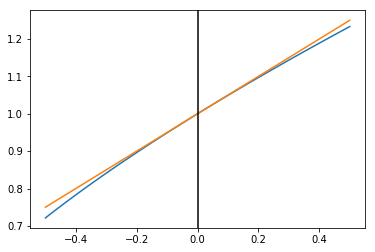

In [8]:
plt.plot(x, x/y)
plt.plot(x, 1 + x/2)
plt.axvline(0, color='black')

We can approximate $z_1$ better with 1 + x/2. So

$$ \begin{align}
y &= x/z_1 \\
y &\approx x/(1 + x/2)
\end{align} $$

And that's our second order continued fraction approximation!

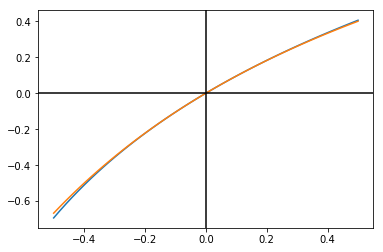

In [9]:
plt.plot(x, y)
plt.plot(x, x/(1 + x/2))
plt.axhline(0, color='black')
plt.axvline(0, color='black')

Continuing,

$$ \begin{align}
y &\approx x/(1 + x/2) \\
y &= x/(1 + x/z_2) \\
x/y &= 1 + x/z_2 \\
x/y - 1 &= x/z_2 \\
x/(x/y - 1) &= z_2
\end{align} $$

so we plot and approximate x/(x/y - 1)

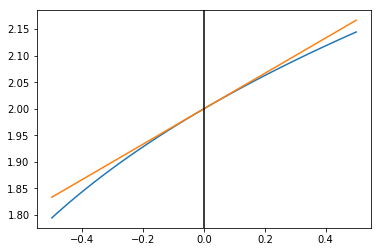

In [10]:
plt.plot(x, x/(x/y - 1))
plt.plot(x, 2 + x/3)
plt.axvline(0, color='black')

and plug it back in to get the third order continued fraction approximation

$$ \begin{align}
y &= x/(1 + x/z_2) \\
y &\approx x/(1 + x/(2 + x/3))
\end{align} $$

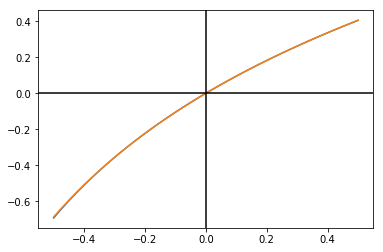

In [11]:
plt.plot(x, y)
plt.plot(x, x/(1 + x/(2 + x/3)))
plt.axhline(0, color='black')
plt.axvline(0, color='black')

It seems to work pretty well! I don't have a proof of convergence or anything, but for this example, it seems to produce better approximations than the same order Taylor series.

Here's a bigger plot of the second order Taylor and continued fraction approximations, together:

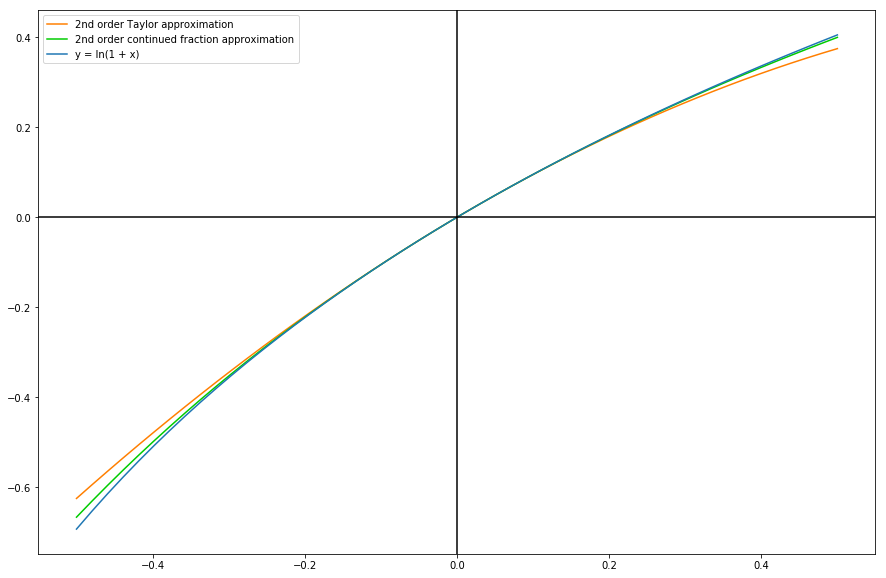

In [12]:
plt.figure(figsize=(15, 10))
plt.plot(x, x - x*x/2, color='#ff7f00', label="2nd order Taylor approximation")
plt.plot(x, x/(1 + x/2), color='#00cc00', label="2nd order continued fraction approximation")
plt.plot(x, y, label="y = ln(1 + x)")
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.legend()

And the relative error of the second order and third order approximations. In both cases, continued fraction (green) beats Taylor expansion (orange).

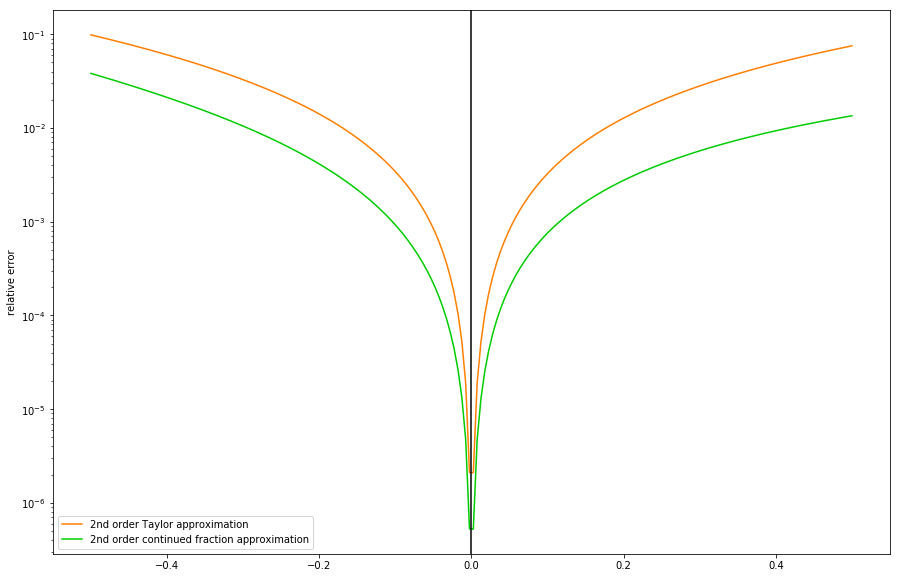

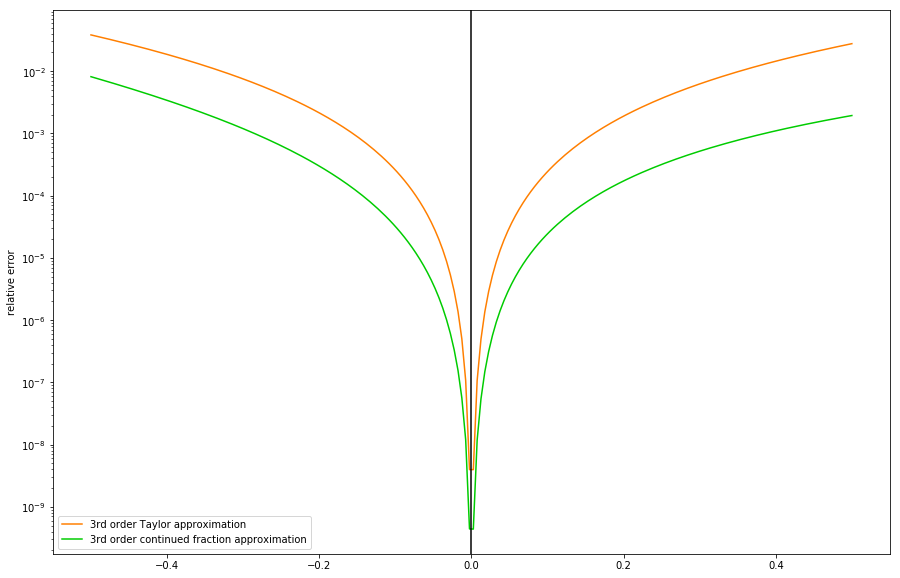

In [13]:
x = np.linspace(-0.5, 0.5, 200)
y = np.log1p(x)

plt.figure(figsize=(15, 10))
plt.plot(x, np.abs((x - x*x/2)/y-1), color='#ff7f00', label="2nd order Taylor approximation")
plt.plot(x, np.abs((x/(1 + x/2))/y-1), color='#00cc00', label="2nd order continued fraction approximation")
plt.ylabel('relative error')
plt.yscale('log')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.legend()

plt.figure(figsize=(15, 10))
plt.plot(x, np.abs((x - x*x/2 + x*x*x/3)/y-1), color='#ff7f00', label="3rd order Taylor approximation")
plt.plot(x, np.abs((x/(1 + x/(2 + x/3)))/y-1), color='#00cc00', label="3rd order continued fraction approximation")
plt.ylabel('relative error')
plt.yscale('log')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.legend()

We can do this for other functions too! Here's y = e^x

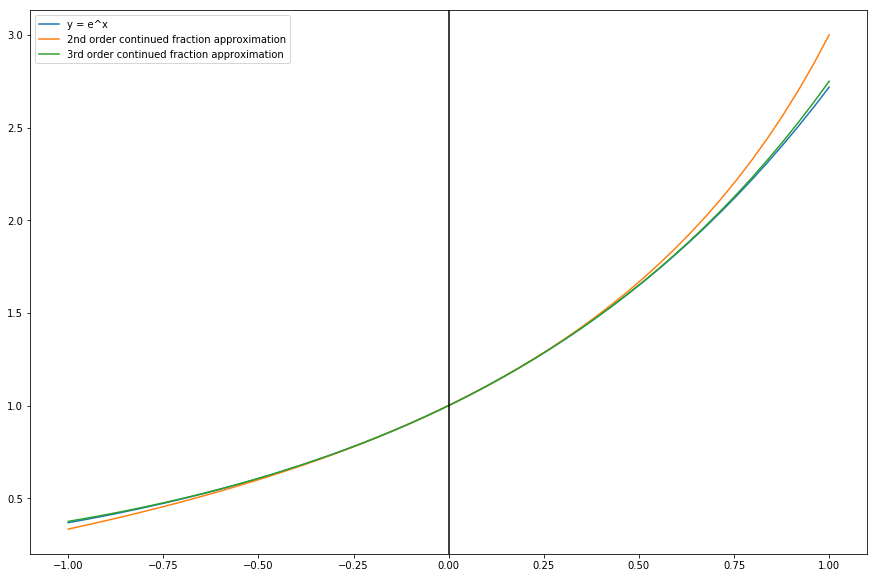

In [14]:
x = np.linspace(-1, 1)
y = np.exp(x)
plt.figure(figsize=(15, 10))
plt.plot(x, y, label="y = e^x")
plt.plot(x, 1 + x/(1 - x/2), label="2nd order continued fraction approximation")
plt.plot(x, 1 + x/(1 - x/(2 + x/3)), label="3rd order continued fraction approximation")
plt.axvline(0, color='black')
plt.legend()

And y = sin(x)

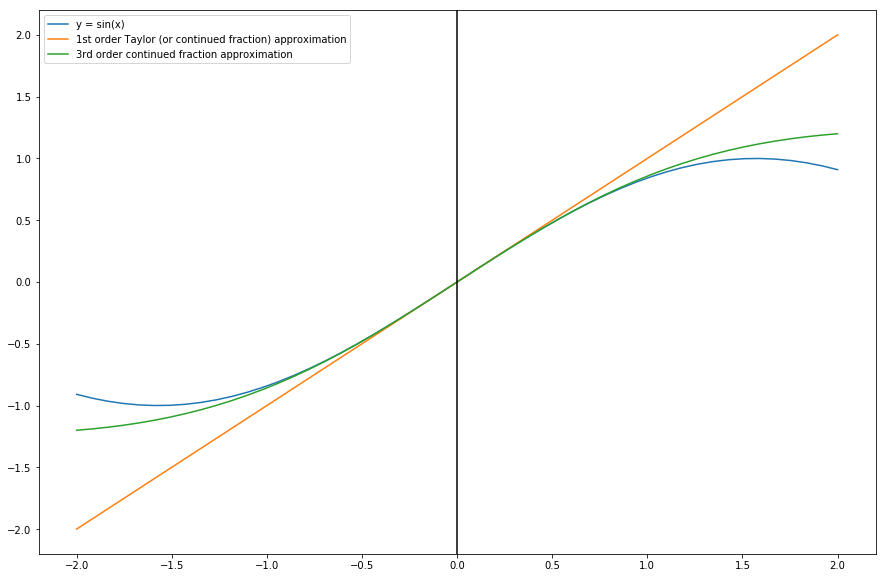

In [15]:
x = np.linspace(-2, 2)
y = np.sin(x)
plt.figure(figsize=(15, 10))
plt.plot(x, y, label="y = sin(x)")
plt.plot(x, x, label="1st order Taylor (or continued fraction) approximation")
plt.plot(x, x/(1 + x*x/6), label="3rd order continued fraction approximation")
plt.axvline(0, color='black')
plt.legend()

In the case of y = sin(x), this seems to be worse than the same order Taylor approximation. Is there a theory for when this method does well?

I searched for information about this and I came across [Padé approximant](https://en.wikipedia.org/wiki/Pad%C3%A9_approximant). Does the procedure I've described compute a Padé approximant?